<h2><font color="#004D7F" size=6>Unidad 5. Fase de modelado</font></h2>




<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Italo Contreras Peerez</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Cargando mi dataset](#section11)
* [2. Algoritmos de Regresión](#section2)
    * [2.1. Algoritmos de taxonomía lineal](#section21)
    * [2.2. Algoritmos de taxonomía no lineal](#section22)
    * [2.3. Plantilla para comparar algoritmos](#section23)    
* [3. Algoritmos de conjunto](#section3)
    * [3.1. Algoritmo Bagging](#section31)
    * [3.1. Algoritmo Boosting](#section32)
    * [3.1. Algoritmo Voting](#section33)    
* [4. Super Lerner](#section4)


In [2]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

En esta sección, vamos a analizar algunos de estos algoritmos, en especial, los de taxonomía lineal y no lineal. En cuanto a la taxonomía de conjunto o ensamblados, como los tipo boosting y bagging, los veremos posteriormente cuando ya tengamos una base sólida de estos primeros. 


<a id="section12"></a>
## <font color="#004D7F"> 1.1. Cargando mi dataset</font>

Voy a seguir usando el dataset que escogi desde un prinicipio


In [92]:

import pandas as pd
filename_reg = 'data/forestfires.csv'
data = pd.read_csv(filename_reg)
data1=data.drop(['month'], axis=1)
data2=data1.drop(['day'], axis=1)
#names=['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
array_reg = data2.values
X=data2.drop("area",1)
Y=data2["area"]
#Dividamos la data de esta forma par el SuperLerner
X_SL=array_reg[:,0:10]
Y_SL=array_reg[:,10]




<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Algoritmos de Regresión</font>


En esta sección se estudiarán seis algoritmos de Machine Learning que puede usar al verificar su problema de regresión en Python con scikit-learn. Para ello, vamos a echar un vistazo a siete algoritmos de regresión. 

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Algoritmos de taxonomía lineal</font>

Comenzamos con cuatro algoritmos lineales:
* Linear Regression (LiR).
* Ridge Regression (RiR).
* LASSO Linear Regression (LASSO). 
* Elastic Net Regression (ENR).

<a id="section211"></a>
### <font color="#004D7F"> 2.1.1. Linear Regression</font>

LiR supone que las variables de entrada tienen una distribución gaussiana. También se supone que las variables de entrada son relevantes para la variable de salida y que no están altamente correlacionadas entre sí (un problema llamado colinealidad). 

In [8]:
# Linear Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


kfold=KFold(n_splits=10,random_state=7)
model=LinearRegression()
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")

MSE: -4128.861078750497


Vemos que obtenemos un error muy alto, vamos a tratar de reducir esto usando otros modelos de taxonomia lineal

<a id="section212"></a>
### <font color="#004D7F"> 2.1.2. Ridge Regression</font>

RiR es una extensión de LiR donde la función de pérdida se modifica para minimizar la complejidad del modelo medido como el valor de la suma cuadrática de los valores del coeficiente (también llamada norma __L2__). 

In [9]:
# Ridge Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge


kfold=KFold(n_splits=10,random_state=7)
model=Ridge()
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -4118.679963611857


Vemos que con este modelo obtenemos un error menor que con el de regresion lineal

<a id="section213"></a>
### <font color="#004D7F"> 2.1.3. LASSO Regression</font>

LASSO es una modificación de LiR, como RiR, donde la función de pérdida se modifica para minimizar la complejidad del modelo medido como el valor absoluto de los valores del coeficiente (también llamada la norma __L1__). Puede construir un modelo LASSO utilizando la clase `Lasso`.

In [10]:
# LASSO Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso


kfold=KFold(n_splits=10,random_state=7)
model=Lasso()
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -4110.55839395247


Vemos que con el modelo LASSO obtenemos un error menor que los 2 anteriores

<a id="section214"></a>
### <font color="#004D7F"> 2.1.4. ElasticNet Regression</font>

ENR es una forma de regresión de regularización que combina las propiedades de RIR y LASSO. Busca minimizar la complejidad del modelo de regresión (magnitud y número de coeficientes de regresión) penalizando el modelo utilizando tanto la norma L2 (valores de coeficiente de suma cuadrática) como la norma L1 (valores de coeficiente absoluto de suma). Puede construir un modelo ENR utilizando la clase `ElasticNet`.

In [11]:
# ElasticNet Regression
# Linear Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet


kfold=KFold(n_splits=10,random_state=7)
model=ElasticNet()
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")

MSE: -4109.062032102183


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Vemos que con este modelo de todos los de taxonomia lineal que estamos viendo se tiene un menor error

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Algoritmos de taxonomía no lineal</font>

Posteriormente, estudiaremos tres algoritmos no lineales:
* $k$-Nearest Neighbors ($k$-NN).
* Classification and Regression Trees (CART). 
* Support Vector Machines (SVM).

<a id="section221"></a>
### <font color="#004D7F"> 2.2.1. $k$-Nearest Neighbours</font>

$k$-NN localiza las $k$ instancias más similares en el conjunto de datos de entrenamiento para una nueva instancia de datos. De los $k$ vecinos, se toma una variable de salida media o mediana como la predicción. 

In [12]:
# k-NN Regressionore

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor


kfold=KFold(n_splits=10,random_state=7)
model=KNeighborsRegressor()
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")


MSE: -5331.62783328371


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Vemos que el error se ha disparado, en comparacion a los 4 modelos de arriba, lo bueno es que este modelo tienes varios hiperparametros que se les puede modificar de tal forma que este error se reduzca lo mayor posible

In [ ]:
Por ejemplo ahora vamos ahora a modificar los hiperparametros, por ejemplo cambiaremos el algorithm,los vecinos y el weights

In [15]:
# k-NN Regressionore

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor


kfold=KFold(n_splits=10,random_state=7)
model=KNeighborsRegressor(n_neighbors=9,algorithm='kd_tree',weights='distance')
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")


MSE: -4671.965507925192


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Vemos que nuestro error ha disminuido

<a id="section222"></a>
### <font color="#004D7F"> 2.2.2. Classification and Regression Trees</font>

CART usa los datos de entrenamiento para seleccionar los mejores puntos para dividir los datos con el fin de minimizar una métrica de costos. La métrica de costo predeterminada para los árboles de decisión de regresión es el error cuadrático medio, especificado en el parámetro `criterion`. Puede construir un modelo CART utilizando la clase `DecisionTreeRegressor`.

In [19]:
# CART Regression

from sklearn.tree import DecisionTreeRegressor

kfold=KFold(n_splits=10,random_state=7)
model=DecisionTreeRegressor(criterion='friedman_mse')
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")

MSE: -11795.850850700415


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


<a id="section223"></a>
### <font color="#004D7F"> 2.2.3. Support Vector Machines</font>

SVM se desarrollaró para la clasificación binaria. La técnica se ha extendido para los problemas de predicción de valores reales llamados Support Vector Regression (SVR). Primero vamos a usar un modelo sin ponerle parametros(en este caso toma por defecto al parametro kernel con un valor de 'rbf')


In [21]:
# CART Regression
from sklearn.svm import SVR

kfold=KFold(n_splits=10,random_state=7)
model=SVR()
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -4202.62502384061


Vemos que nos sale un error alto. Ahora vamos a modificarle 2 parametros, el kernel y el degree.

In [26]:
# CART Regression
from sklearn.svm import SVR

kfold=KFold(n_splits=10,random_state=7)
model=SVR(kernel='sigmoid',degree=3)
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -4185.091464706861


Observamos que el error se ha reducido un poco. Ahora vamos a darle al parametro kernel el valor 'linear', con esto vamos a hacer que nuestro svm se comporto como un modelo de taxonomia lineal

In [27]:
# CART Regression
from sklearn.svm import SVR

kfold=KFold(n_splits=10,random_state=7)
model=SVR(kernel='linear')
scoring='neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print(f"MSE: {results.mean()}")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -4193.396414864668


Aún asi vemos que nuestro modelo tiene mucho error, esto puede ser porque nuestros datos no se ajustan a un modelo lineal.

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Plantilla para comparar algoritmos</font>

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from matplotlib import pyplot

models= []

models.append(( 'LiR',LinearRegression( )))
models.append(( 'Ridge',Ridge()))
models.append(( 'Lasso',Lasso()))
models.append(( 'ElN',ElasticNet()))
models.append(( 'KNN',KNeighborsRegressor()))
models.append(( 'CART' ,DecisionTreeRegressor(criterion='friedman_mse')))
models.append(( 'SVR' , SVR(kernel='linear')))

results=[]           
names= []
scoring='neg_mean_squared_error'

for name, model in models: 
    kfold = KFold( n_splits=10, random_state=7) 
    cv_results = cross_val_score (model, X, Y, cv=kfold , scoring=scoring) 
    results.append(cv_results) 
    names.append(name) 
    print(f"{name}: {cv_results.mean()} ({ cv_results.std()}%)")
 

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LiR: -4128.861078750497 (7977.634994360253%)
Ridge: -4118.679963611857 (7980.55101357425%)
Lasso: -4110.55839395247 (7992.040254499503%)
ElN: -4109.062032102183 (7992.440799899827%)

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



KNN: -5331.62783328371 (7966.558312232972%)
CART: -11770.08231522153 (20041.88459979405%)


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVR: -4193.396414864668 (8343.068466551533%)


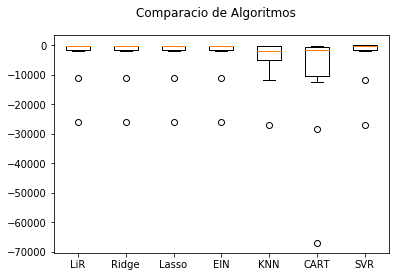

In [34]:
# boxplot algorithm comparison 
fig = pyplot.figure() 
fig.suptitle('Comparacio de Algoritmos') 
ax = fig.add_subplot(111) 
pyplot.boxplot( results) 
ax.set_xticklabels(names) 
pyplot .show()


Vemos que el ElN es el modelo que tiene un error menor y tambien una menor varianza

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Algoritmos de conjunto</font>

Cuando usamos distintos estimadores para un mismo conjunto de datos

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Algoritmos Bagging</font>

<a id="section311"></a>
### <font color="#004D7F"> 3.1.1. Bagged Decision Trees</font>

In [40]:
from sklearn . model_selection import KFold 
from sklearn . model_selection import cross_val_score 
from sklearn .ensemble import BaggingRegressor
from sklearn . tree import DecisionTreeRegressor 
seed = 7 
kfold = KFold( n_splits=10, random_state=seed) 
cart = DecisionTreeRegressor () 
num_trees = 100 
model = BaggingRegressor( base_estimator=cart , n_estimators=num_trees , random_state=seed) 
results = cross_val_score (model, X, Y, cv=kfold) 
print(f"MSE: {results.mean()}({ results.std()}%)")


C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -109.74255583209103(322.76624492662876%)


<a id="section312"></a>
### <font color="#004D7F"> 3.1.2. Random Forest</font>

In [41]:
from sklearn . model_selection import KFold 
from sklearn . model_selection import cross_val_score 
from sklearn .ensemble import RandomForestRegressor

seed = 7
num_trees = 100 
max_features=3

kfold = KFold( n_splits=10, random_state=seed) 
model = RandomForestRegressor( n_estimators=num_trees ,max_features=max_features, random_state=seed) 
results = cross_val_score (model, X, Y, cv=kfold) 
print(f"MSE: {results.mean()}({ results.std()}%)")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -85.82939342796419(250.2076745810255%)


<a id="section313"></a>
### <font color="#004D7F"> 3.1.3. Extra Trees</font>

In [43]:
from sklearn . model_selection import KFold 
from sklearn . model_selection import cross_val_score 
from sklearn .ensemble import ExtraTreesRegressor

seed = 7
num_trees = 100 
max_features=3

kfold = KFold( n_splits=10, random_state=seed) 
model = ExtraTreesRegressor( n_estimators=num_trees ,max_features=max_features, random_state=seed) 
results = cross_val_score (model, X, Y, cv=kfold) 
print(f"MSE: {results.mean()}({ results.std()}%)")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -173.21683635450495(500.2481313017765%)


<a id="section32"></a>
## <font color="#004D7F"> 3.2. Algoritmos Boosting</font>

Tambien llamados algorimtos inteligentes

<a id="section321"></a>
### <font color="#004D7F"> 3.2.1. AdaBoost</font>

In [48]:
from sklearn . model_selection import KFold 
from sklearn . model_selection import cross_val_score 
from sklearn .ensemble import AdaBoostRegressor

seed = 7
num_trees = 30
max_features=3

kfold = KFold( n_splits=10, random_state=seed) 
model = AdaBoostRegressor( n_estimators=num_trees, random_state=seed) 
results = cross_val_score (model, X, Y, cv=kfold) 
print(f"MSE: {results.mean()}({ results.std()}%)")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -169.13316518650453(494.25621594157536%)


In [47]:
from sklearn . model_selection import KFold 
from sklearn . model_selection import cross_val_score 
from sklearn .ensemble import AdaBoostRegressor

seed = 7
num_trees = 100
max_features=3

kfold = KFold( n_splits=10, random_state=seed) 
model = AdaBoostRegressor( n_estimators=num_trees, random_state=seed) 
results = cross_val_score (model, X, Y, cv=kfold) 
print(f"MSE: {results.mean()}({ results.std()}%)")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -294.51571159082715(854.2300759223095%)


Vemos que al aumentar la cantidad de arboles tenemos peores resultados ya que el error se incrementa y la varianza también

<a id="section322"></a>
### <font color="#004D7F"> 3.2.2. Stochastic Gradient Boosting</font>

Es un algoritmo muy sofisticado, que se dispara bastante en el consumo computancional

In [51]:
from sklearn . model_selection import KFold 
from sklearn . model_selection import cross_val_score 
from sklearn .ensemble import GradientBoostingRegressor

seed = 7
num_trees = 100
max_features=3

kfold = KFold( n_splits=10, random_state=seed) 
model = GradientBoostingRegressor( n_estimators=num_trees, random_state=seed) 
results = cross_val_score (model, X, Y, cv=kfold) 
print(f"MSE: {results.mean()}({ results.std()}%)")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -67.56414196486551(181.5561008831879%)


Vemos que tenemos poco error, pero la varianza sigue siendo alta, ahora vamos a ponerle un valor al hiperparametro learning_rate

In [52]:
from sklearn . model_selection import KFold 
from sklearn . model_selection import cross_val_score 
from sklearn .ensemble import GradientBoostingRegressor

seed = 7
num_trees = 100
max_features=3

kfold = KFold( n_splits=10, random_state=seed) 
model = GradientBoostingRegressor( n_estimators=num_trees,learning_rate=0.3, random_state=seed) 
results = cross_val_score (model, X, Y, cv=kfold) 
print(f"MSE: {results.mean()}({ results.std()}%)")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -115.67702684913942(313.93853304159626%)


Vemos que tenemos un peor modelo, hay mas error y varianza, pero igual debemos probar con distintos hiperparametros porque puede para un conjunto de datos sí se mejore el modelo al ponerle un learning_rate que no sea el que esta por defecto

<a id="section33"></a>
## <font color="#004D7F"> 3.3. Algoritmo Voting</font>

Es un algoritmo un poco mas especializado porque usamos distintos estimadores y ver una ponderacion de esos resultados. Este algoritmo puede dar buenos resultados, aunque es un poco complejo

In [56]:
from sklearn . model_selection import KFold 
from sklearn . model_selection import cross_val_score 
from sklearn . linear_model import LinearRegression 
from sklearn . tree import DecisionTreeRegressor 
from sklearn .svm import SVR
from sklearn .ensemble import VotingRegressor 


kfold = KFold( n_splits=10, random_state=7) 
# creando los submodelos 
estimators = [] 
model1 = LinearRegression() 
estimators.append(('regression', model1) ) 
model2=DecisionTreeRegressor(criterion='friedman_mse')
estimators.append(( 'cart' , model2) ) 
model3=SVR(kernel='linear') 
estimators .append(( 'svr' , model3) ) 
# creando el modelo ensamblado 
ensemble = VotingRegressor ( estimators ) 
results = cross_val_score (ensemble , X, Y, cv=kfold) 
print(f"MSE: {results.mean()}({ results.std()}%)")

C:\Users\Italo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


MSE: -38.586852241008835(109.6856989922095%)


---

<a id="section3"></a>
# <font color="#004D7F"> 4. Super Lerner</font>

Importando las librerias

In [66]:
from math import sqrt 
from numpy import hstack 
from numpy import vstack 
from numpy import asarray 
from sklearn . model_selection import KFold 
from sklearn . model_selection import train_test_split 
from sklearn . metrics import mean_squared_error 
from sklearn . linear_model import LinearRegression 
from sklearn . linear_model import ElasticNet 
from sklearn . neighbors import KNeighborsRegressor 
from sklearn . tree import DecisionTreeRegressor 
from sklearn .svm import SVR 
from sklearn .ensemble import AdaBoostRegressor 
from sklearn .ensemble import BaggingRegressor 
from sklearn .ensemble import RandomForestRegressor 
from sklearn .ensemble import ExtraTreesRegressor



Hacemos la vidision de la data para el entrenamiento del SuperLerner y luego el test

In [93]:
# Division 
X_SL, X_val , Y_SL, Y_val = train_test_split (X_SL, Y_SL, test_size =0.50) 
print ( 'Train' , X_SL.shape , Y_SL.shape , 'Test' , X_val .shape , Y_val .shape) 


Train (258, 10) (258,) Test (259, 10) (259,)


Creando la lista de modelos con los escogidos anteriormente

In [94]:

def get_models () : 
    models = list () 
    models.append(LinearRegression () ) 
    models.append( Ridge () ) 
    models.append(SVR(kernel='linear')) 
    models.append(DecisionTreeRegressor (criterion='friedman_mse') ) 
    models.append(KNeighborsRegressor () ) 
    models.append(AdaBoostRegressor () ) 
    models.append(BaggingRegressor( n_estimators=10)) 
    models.append(RandomForestRegressor( n_estimators=10)) 
    models.append(ExtraTreesRegressor ( n_estimators=10)) 
    return models

Hacemos la validacion cruzada

In [96]:

# Recolectar las predicciones de una validacion cruzada 
def get_out_of_fold_predictions (X_SL, Y_SL, models) : 
    meta_X, meta_Y = list(), list() 
    # Definicion del kfold 
    kfold = KFold( n_splits=10, shuffle=True) 
    # Enumerar las particiones 
    for train_ix , test_ix in kfold.split(X_SL) : 
        fold_yhats = list () 
        # Obetenemos los datos 
        train_X , test_X = X_SL[ train_ix ] , X_SL[ test_ix ] 
        train_Y , test_Y = Y_SL[ train_ix ] , Y_SL[ test_ix ] 
        meta_Y. extend( test_Y ) 
        # Ajuste y predicciones de cada modelo 
        for model in models: 
            model.fit(train_X , train_Y ) 
            yhat = model. predict ( test_X ) 
            # Almacena las columnas 
            fold_yhats.append(yhat . reshape(len (yhat) ,1) ) 
        # Almacena el fold y yhats como columnas 
        meta_X.append(hstack( fold_yhats ) ) 
    return vstack (meta_X) , asarray (meta_Y)


Ahora vamos a evaluar el modelo. Primero obtenemos los modelos y usa la funcion de hace un momento para obtener el meta_X y el meta_Y para el metaclasificador

In [97]:
models = get_models ()
meta_X, meta_Y = get_out_of_fold_predictions (X_SL, Y_SL, models) 

In [ ]:
Ahora ajustamos todos los modelos al dataset de entrenamiento

In [98]:
def fit_base_models (X_SL, Y_SL, models) :
    for model in models: 
        model. fit (X_SL, Y_SL)


Ahora hacemos el ajuste del metamodelo

In [99]:
def fit_meta_model(X_SL, Y_SL) : 
    model = LinearRegression () 
    model. fit (X_SL, Y_SL) 
    return model


Ahora creamos una funcion de evaluacion de modelos bases para ver cuales son los modelos que tienen peor y mejor puntaje par a mi conjunto de datos

In [103]:
 def evaluate_models(X_SL, Y_SL, models) : 
        for model in models: 
            yhat = model. predict (X_SL) 
            mse = mean_squared_error(Y_SL, yhat) 
            print ( '% s : RMSE %.3f ' % (model. __class__ .__name__ , sqrt (mse) ) )


Ahora vamos a hacer las predicciones de ese modelo

In [101]:
def super_learner_predictions (X_SL, models , meta_model) : 
    meta_X = list () 
    for model in models: 
        yhat = model. predict (X_SL) 
        meta_X.append(yhat . reshape(len (yhat) ,1) ) 
    meta_X = hstack(meta_X) 
    # Prediccion 
    return meta_model. predict (meta_X)


Ahora ajustamos y evaluamos

In [105]:
#Ajuste de modelos base
fit_base_models (X_SL, Y_SL, models) 
# Ajuste del meta−modelo 
meta_model = fit_meta_model(meta_X, meta_Y) 
# Evaluar modelos base 
evaluate_models(X_val , Y_val , models) 
# evaluar el meta−modelo 
yhat = super_learner_predictions (X_val , models , meta_model) 
print ( 'Super Learner : RMSE %.3f ' % ( sqrt (mean_squared_error( Y_val , yhat) ) ) )


LinearRegression : RMSE 33.250 
Ridge : RMSE 33.094 
SVR : RMSE 33.555 
DecisionTreeRegressor : RMSE 45.898 
KNeighborsRegressor : RMSE 36.077 
AdaBoostRegressor : RMSE 34.015 
BaggingRegressor : RMSE 39.117 
RandomForestRegressor : RMSE 50.314 
ExtraTreesRegressor : RMSE 58.357 
Super Learner : RMSE 32.122 


Vemos que los algoritmos de taxonomia lineal se ajustan un poco mejor a mi dataset en comparacion a los algoritmos de conjunto.
Vemos que falta configurar un poco estos modelos porque hemos puesto en RandomForest, BagginRegressor y ExtraTrees a 10 estimadores(Arboles), quizas si se configura mejor se tienen mejores resultados